### 演習19）

この演習では，ポリマーと無機化合物の屈折率の間での転移学習モデルを訓練する．

In [2]:
%run common_setting.ipynb

import pandas as pd
import numpy as np
import joblib

#### 訓練データ

この演習は，高分子物データベースPolymer Genomeに収録してある第一原理計算で算出した853個のポリマーの屈折率の値とCitrinationというデータレポジトリ(Citrin Informatics社)から抽出した1,056件の無機化合物の屈折率の値を使用する．

まず，用意された`refractive_index.pd.xz`からデータを読み込む．

In [3]:
refractive_index = pd.read_pickle('data/refractive_index.pd.xz')
refractive_index

,refractive_index,formula,polymer,composition
mp-441,1.86,Rb2Te,False,"{'Rb': 2.0, 'Te': 1.0}"
mp-22881,1.78,CdCl2,False,"{'Cd': 1.0, 'Cl': 2.0}"
mp-28013,2.23,MnI2,False,"{'Mn': 1.0, 'I': 2.0}"
mp-567290,2.65,LaN,False,"{'La': 1.0, 'N': 1.0}"
mp-560902,1.53,MnF2,False,"{'Mn': 1.0, 'F': 2.0}"
...,...,...,...,...
MOL1065,1.77,C40H52O4Sn2,True,"{'C': 40.0, 'H': 52.0, 'O': 4.0, 'Sn': 2.0}"
MOL1066,1.74,C48H52O6Sn2,True,"{'C': 48.0, 'H': 52.0, 'O': 6.0, 'Sn': 2.0}"
MOL1067,1.68,Sn2C16H32O10,True,"{'Sn': 2.0, 'C': 16.0, 'H': 32.0, 'O': 10.0}"
MOL1068,1.75,Sn4O8C16H48,True,"{'Sn': 4.0, 'O': 8.0, 'C': 16.0, 'H': 48.0}"


#### 組成記述子を計算する

演習12）述べたように，`xenonpy.descriptor.Compositions`を用いて記述子を計算する．

In [4]:
from xenonpy.descriptor import Compositions

compositions = Compositions()
desc = compositions.fit_transform(refractive_index)

desc

,ave:atomic_number,ave:atomic_radius,ave:atomic_radius_rahm,ave:atomic_volume,ave:atomic_weight,ave:boiling_point,ave:bulk_modulus,ave:c6_gb,ave:covalent_radius_cordero,ave:covalent_radius_pyykko,...,min:num_s_valence,min:period,min:specific_heat,min:thermal_conductivity,min:vdw_radius,min:vdw_radius_alvarez,min:vdw_radius_mm3,min:vdw_radius_uff,min:sound_velocity,min:Polarizability
mp-441,42.000000,218.666667,240.666667,44.100000,99.511867,1061.666667,23.333333,3263.666667,192.666667,185.333333,...,1.0,5.0,0.201,3.00000,206.0,199.0,244.0,411.4,1300.000000,5.500000
mp-22881,27.333333,149.569212,216.666667,16.833333,61.104667,505.066667,14.733333,199.733333,116.000000,111.333333,...,2.0,3.0,0.232,0.00890,175.0,182.0,207.0,284.8,206.000000,2.180000
mp-28013,43.666667,145.493061,239.333333,19.596667,102.915661,1050.000000,45.133333,471.000000,142.666667,128.333333,...,2.0,4.0,0.477,0.44900,198.0,204.0,224.0,296.1,3289.214936,5.350000
mp-567290,32.000000,139.500000,231.500000,19.900000,76.456235,1903.700000,42.682441,1877.850000,139.000000,125.500000,...,2.0,2.0,0.197,0.02583,155.0,166.0,193.0,352.2,333.600000,1.100000
mp-560902,14.333333,134.349076,189.333333,13.863333,30.978283,801.673333,71.199293,218.466667,88.000000,82.333333,...,2.0,2.0,0.477,0.02770,147.0,146.0,171.0,296.1,2826.915883,0.557000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MOL1065,4.326531,88.334752,171.306122,10.548980,8.512980,2147.972653,47.898014,38.278776,51.775510,53.020408,...,1.0,1.0,0.222,0.02658,110.0,120.0,162.0,288.6,317.500000,0.666793
MOL1066,4.518519,89.603783,172.685185,10.224074,8.910722,2328.534259,47.316829,38.591852,53.611111,54.833333,...,1.0,1.0,0.222,0.02658,110.0,120.0,162.0,288.6,317.500000,0.666793
MOL1067,5.133333,96.166903,169.566667,11.810000,10.364033,1470.614333,53.710815,42.862000,51.633333,52.233333,...,1.0,1.0,0.222,0.02658,110.0,120.0,162.0,288.6,317.500000,0.666793
MOL1068,5.368421,92.968571,168.315789,12.352632,11.097263,1229.828421,53.884619,53.585263,49.210526,50.000000,...,1.0,1.0,0.222,0.02658,110.0,120.0,162.0,288.6,317.500000,0.666793


#### 訓練済みのrefractive indexモデルをロードする

In [5]:
# import packages

import torch
import torch.optim as optim
import torch.nn as nn
import xenonpy as xe

from datetime import datetime, timedelta
from platform import version as sys_ver
from sys import version as py_ver
from pathlib import Path
from collections import OrderedDict

from torch.utils.data import DataLoader

from xenonpy.datatools import Splitter, preset, Dataset
from xenonpy.utils import ParameterGenerator
from xenonpy.model import SequentialLinear
from xenonpy.model.utils import regression_metrics
from xenonpy.model.training.dataset import ArrayDataset
from xenonpy.model.training import Trainer, Checker, Adam, SGD, MSELoss, ClipNorm, ClipValue, ExponentialLR

from xenonpy.model.training.extension import TensorConverter, Validator, Persist

PyTorchのバージョンにより下記のような警告が出る場合もあるが，PyTorchのバージョンは1.7.0以上であれば，読み込みできることが確認していた．

In [6]:
trainer = Trainer.from_checker('data/refractive_index_NN_model')

trainer

/home/liuchang/mambaforge/envs/xenonpy/lib/python3.8/site-packages/torch/serialization.py:786: SourceChangeWarning: source code of class 'xenonpy.model.sequential.SequentialLinear' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/liuchang/mambaforge/envs/xenonpy/lib/python3.8/site-packages/torch/serialization.py:786: SourceChangeWarning: source code of class 'xenonpy.model.sequential.LinearLayer' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/liuchang/mambaforge/envs/xenonpy/lib/python3.8/site-packages/torch/serialization.py:786: SourceChangeWarning: source code of class 'torch.nn.modules.linear.Linear' has changed

Trainer(cuda=device(type='cpu'),
        model=SequentialLinear(
  (layer_0): LinearLayer(
    (linear): Linear(in_features=290, out_features=187, bias=True)
    (dropout): Dropout(p=0.1, inplace=False)
    (normalizer): BatchNorm1d(187, eps=0.1, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
  )
  (layer_1): LinearLayer(
    (linear): Linear(in_features=187, out_features=15...
    (normalizer): BatchNorm1d(110, eps=0.1, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
  )
  (layer_3): LinearLayer(
    (linear): Linear(in_features=110, out_features=102, bias=True)
    (dropout): Dropout(p=0.1, inplace=False)
    (normalizer): BatchNorm1d(102, eps=0.1, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
  )
  (output): Linear(in_features=102, out_features=1, bias=True)
))

<AxesSubplot:title={'center':'Refractive Index'}, xlabel='Prediction', ylabel='Observation'>

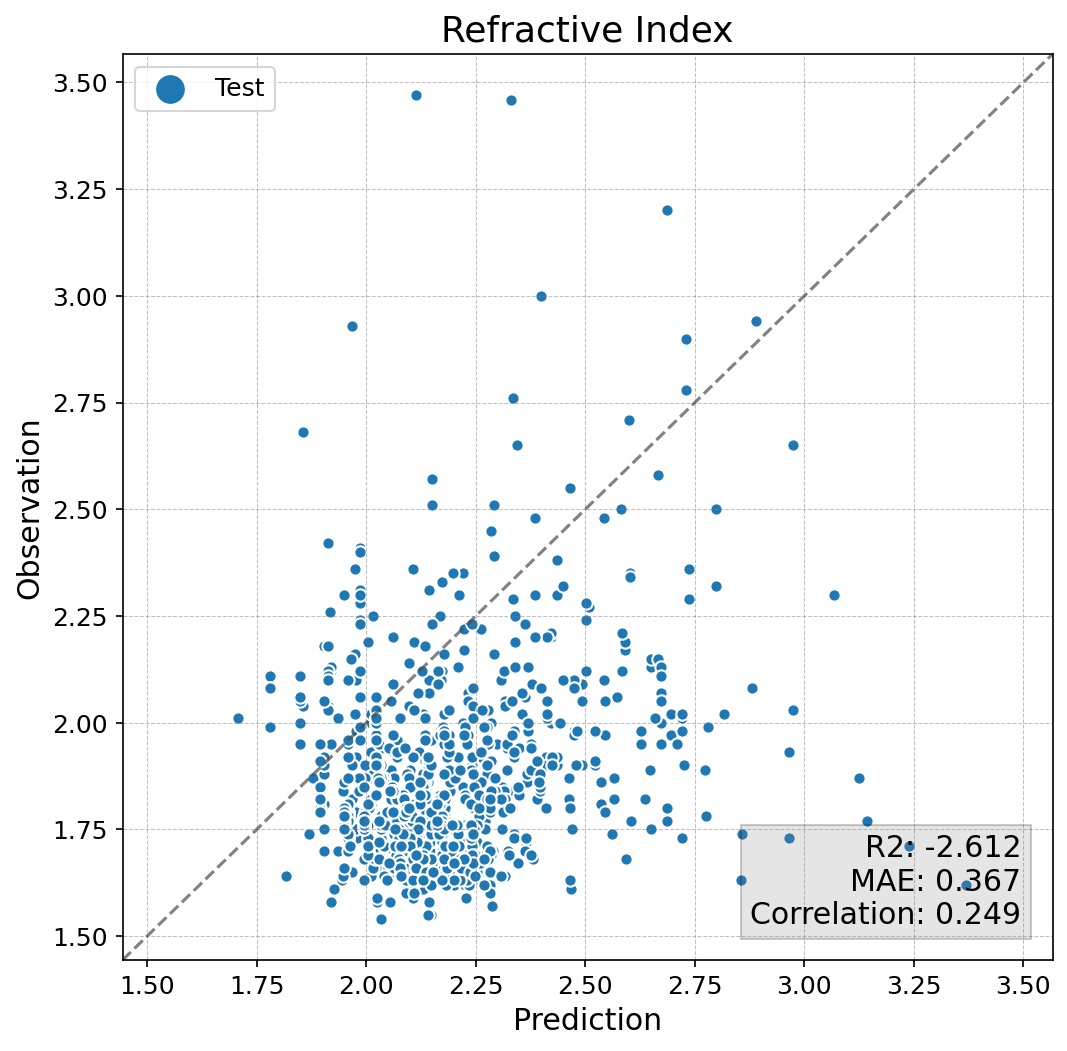

In [7]:
polymer = refractive_index[refractive_index.polymer]

y_pred = trainer.predict(
    x_in=torch.tensor(desc.loc[polymer.index].values, dtype=torch.float),
    checkpoint='mae_1'
).detach().numpy().flatten()
y_true = polymer.refractive_index.values

cv_plot(y_pred, y_true, title='Refractive Index')

見てわかるように，無機材料のデータで訓練した屈折率のモデルは有機ポリマーの予測に使えない．では，転移学習を使ってモデルを再訓練しましょう．

#### 転移学習

##### 隠れ層の抽出 (frozen feature)

`xenonpy.descriptor.FrozenFeaturizer`は`SequentialLinear`で構成したNNモデルから隠れ層の抽出ができる．

これから，`mae`最小のモデルを用いて，最後の隠れ層を使ってTCのランダムフォレストモデルを訓練する．

In [14]:
# --- import necessary libraries

from xenonpy.descriptor import FrozenFeaturizer

trainer.reset(to='mae_1')

# --- init FrozenFeaturizer with NN model
ff = FrozenFeaturizer(model=trainer.model)
ff

FrozenFeaturizer(model=SequentialLinear(
  (layer_0): LinearLayer(
    (linear): Linear(in_features=290, out_features=187, bias=True)
    (dropout): Dropout(p=0.1, inplace=False)
    (normalizer): BatchNorm1d(187, eps=0.1, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
  )
  (layer_1): LinearLayer(
    (linear): Linear(in_features=187, out_features=151, bias=True)
    (dr...
    (normalizer): BatchNorm1d(110, eps=0.1, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
  )
  (layer_3): LinearLayer(
    (linear): Linear(in_features=110, out_features=102, bias=True)
    (dropout): Dropout(p=0.1, inplace=False)
    (normalizer): BatchNorm1d(102, eps=0.1, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
  )
  (output): Linear(in_features=102, out_features=1, bias=True)
))

The following code will generate new "neural descriptors" from the corresponding neural network model.

In [18]:
neural_descriptors = ff.transform(desc.loc[polymer.index], depth=1 ,return_type='df')
neural_descriptors.head(3)

,L(-1)_1,L(-1)_2,L(-1)_3,L(-1)_4,L(-1)_5,L(-1)_6,L(-1)_7,L(-1)_8,L(-1)_9,L(-1)_10,...,L(-1)_93,L(-1)_94,L(-1)_95,L(-1)_96,L(-1)_97,L(-1)_98,L(-1)_99,L(-1)_100,L(-1)_101,L(-1)_102
MOL1,0.197377,0.651708,-1.680189,-1.838958,-1.121671,-0.144814,-0.519181,-0.340774,-0.579195,-1.146178,...,-0.146019,-0.599903,-0.168826,0.135178,0.607779,0.700811,-1.405137,-0.209901,-0.297132,0.071797
MOL2,0.248826,1.177204,-2.156859,-2.349180,-1.382748,-0.333331,0.124294,-0.419852,-0.092012,-0.935228,...,0.026329,-0.161609,-0.542276,0.246088,1.047052,0.067111,-1.963629,-0.109732,-0.328646,0.103320
MOL3,0.187165,0.681242,-1.657468,-1.815903,-1.112543,-0.149633,-0.434844,-0.333764,-0.504946,-1.084423,...,-0.118927,-0.526747,-0.172702,0.154083,0.656889,0.607650,-1.418730,-0.193771,-0.278343,0.091769


In [20]:
from xenonpy.datatools import Splitter

splitter = Splitter(size=neural_descriptors.shape[0], random_state=0, test_size=0.1)
splitter

Splitter(random_state=0, size=1069, test_size=0.1)

In [21]:
x_train, x_test, y_train, y_test = splitter.split(neural_descriptors, polymer.refractive_index)

x_train.shape
y_train.shape
x_test.shape
y_test.shape

(962, 102)

(962,)

(107, 102)

(107,)

In [23]:
# random forest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)
y_fit_pred = rf.predict(x_train)

RandomForestRegressor()

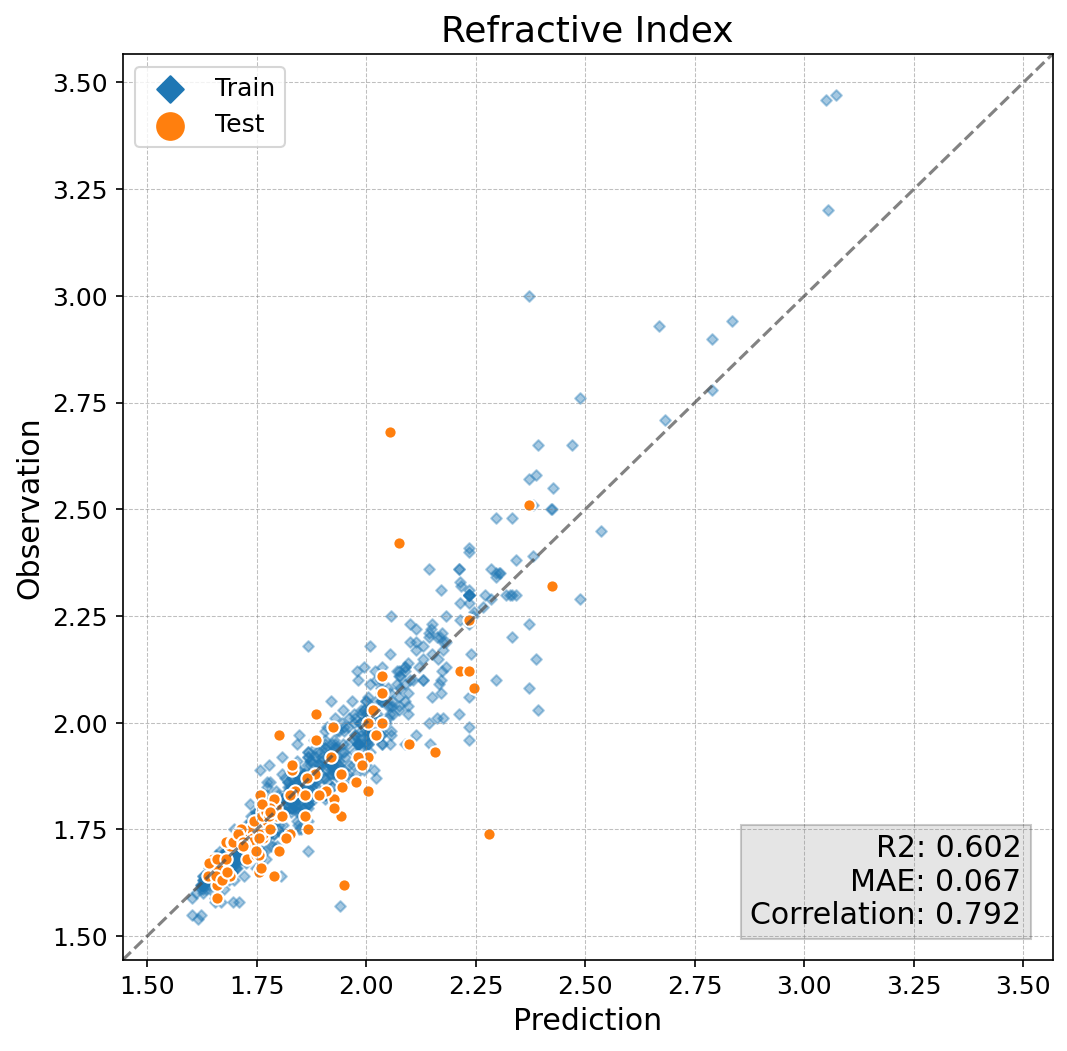

In [27]:
ax = cv_plot(y_pred, y_test.values, y_fit_pred, y_train.values, title='Refractive Index')

転移学習が成功！

演習18と合して，有機ポリマーから無機結晶の屈折率を予測する転移学習のモデルが作れます．結論でいうと，有機から無機の転移学習が成功しないが，余裕があれば自分で試してみてください．